In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix

# if you have recent matplotlib versions it spamms deprecation warnings
# these two lines remove the problem
import warnings
warnings.filterwarnings("ignore", module = "matplotlib\..*" )

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import math
#!pip list

2023-07-09 12:36:22.492771: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data='/Users/alessandrobreccia/Desktop/1_ANNO_MAGISTR/2_semester/LabCompB/Project/Plethysmography/data'
data_1 = pd.read_csv(data+'/01.csv', sep=',')
data_2 = pd.read_csv(data+'/02.csv', sep=',')
data_3 = pd.read_csv(data+'/03.csv', sep=',')
data_4 = pd.read_csv(data+'/04.csv', sep=',')
data_5 = pd.read_csv(data+'/05.csv', sep=',')
data_6 = pd.read_csv(data+'/06.csv', sep=',')
data_7 = pd.read_csv(data+'/07.csv', sep=',')
data_8 = pd.read_csv(data+'/08.csv', sep=',')
data_9 = pd.read_csv(data+'/09.csv', sep=',')
data_10 = pd.read_csv(data+'/10.csv', sep=',')
data_11 = pd.read_csv(data+'/11.csv', sep=',')
data_12 = pd.read_csv(data+'/12.csv', sep=',')
data_13 = pd.read_csv(data+'/13.csv', sep=',')
data_14 = pd.read_csv(data+'/14.csv', sep=',')
data_15 = pd.read_csv(data+'/15.csv', sep=',')
data_16 = pd.read_csv(data+'/16.csv', sep=',')
data_17 = pd.read_csv(data+'/17.csv', sep=',')
data_18 = pd.read_csv(data+'/18.csv', sep=',')
data_19 = pd.read_csv(data+'/19.csv', sep=',')
data_20 = pd.read_csv(data+'/20.csv', sep=',')

data_1[['plety','ECG']] -= data_1[['plety','ECG']].mean() 
data_1[['plety','ECG']] /= data_1[['plety','ECG']].std()
data_2[['plety','ECG']] -= data_2[['plety','ECG']].mean() 
data_2[['plety','ECG']] /= data_2[['plety','ECG']].std()
data_3[['plety','ECG']] -= data_3[['plety','ECG']].mean() 
data_3[['plety','ECG']] /= data_3[['plety','ECG']].std()
data_4[['plety','ECG']] -= data_4[['plety','ECG']].mean() 
data_4[['plety','ECG']] /= data_4[['plety','ECG']].std()
data_5[['plety','ECG']] -= data_5[['plety','ECG']].mean() 
data_5[['plety','ECG']] /= data_5[['plety','ECG']].std()
data_6[['plety','ECG']] -= data_6[['plety','ECG']].mean() 
data_6[['plety','ECG']] /= data_6[['plety','ECG']].std()
data_7[['plety','ECG']] -= data_7[['plety','ECG']].mean() 
data_7[['plety','ECG']] /= data_7[['plety','ECG']].std()
data_8[['plety','ECG']] -= data_8[['plety','ECG']].mean() 
data_8[['plety','ECG']] /= data_8[['plety','ECG']].std()
data_9[['plety','ECG']] -= data_9[['plety','ECG']].mean() 
data_9[['plety','ECG']] /= data_9[['plety','ECG']].std()
data_10[['plety','ECG']] -= data_10[['plety','ECG']].mean() 
data_10[['plety','ECG']] /= data_10[['plety','ECG']].std()
data_11[['plety','ECG']] -= data_11[['plety','ECG']].mean() 
data_11[['plety','ECG']] /= data_11[['plety','ECG']].std()
data_12[['plety','ECG']] -= data_12[['plety','ECG']].mean() 
data_12[['plety','ECG']] /= data_12[['plety','ECG']].std()
data_13[['plety','ECG']] -= data_13[['plety','ECG']].mean() 
data_13[['plety','ECG']] /= data_13[['plety','ECG']].std()
data_14[['plety','ECG']] -= data_14[['plety','ECG']].mean() 
data_14[['plety','ECG']] /= data_14[['plety','ECG']].std()
data_15[['plety','ECG']] -= data_15[['plety','ECG']].mean() 
data_15[['plety','ECG']] /= data_15[['plety','ECG']].std()
data_16[['plety','ECG']] -= data_16[['plety','ECG']].mean() 
data_16[['plety','ECG']] /= data_16[['plety','ECG']].std()
data_17[['plety','ECG']] -= data_17[['plety','ECG']].mean() 
data_17[['plety','ECG']] /= data_17[['plety','ECG']].std()
data_18[['plety','ECG']] -= data_18[['plety','ECG']].mean() 
data_18[['plety','ECG']] /= data_18[['plety','ECG']].std()
data_19[['plety','ECG']] -= data_19[['plety','ECG']].mean() 
data_19[['plety','ECG']] /= data_19[['plety','ECG']].std()
data_20[['plety','ECG']] -= data_20[['plety','ECG']].mean() 
data_20[['plety','ECG']] /= data_20[['plety','ECG']].std()

list_data=[data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12,data_13,data_14,data_15,data_16,data_17,data_18,data_19,data_20]

In [3]:
peaks_path = '/Users/alessandrobreccia/Desktop/1_ANNO_MAGISTR/2_semester/LabCompB/Project/Plethysmography/peaksfolder'
peak_a_1 = pd.read_csv( peaks_path+'/a_peak_1.txt' , sep="," , dtype=int)
peak_a_2 = pd.read_csv( peaks_path+'/a_peak_2.txt' , sep="," , dtype=int)
peak_a_3 = pd.read_csv( peaks_path+'/a_peak_3.txt' , sep="," , dtype=int)
peak_a_4 = pd.read_csv( peaks_path+'/a_peak_4.txt' , sep="," , dtype=int)
peak_a_5 = pd.read_csv( peaks_path+'/a_peak_5.txt' , sep="," , dtype=int)
peak_a_6 = pd.read_csv( peaks_path+'/a_peak_6.txt' , sep="," , dtype=int)
peak_a_7 = pd.read_csv( peaks_path+'/a_peak_7.txt' , sep="," , dtype=int)

peak_a_list = [peak_a_1,peak_a_2,peak_a_3,peak_a_4,peak_a_5,peak_a_6,peak_a_7]

In [4]:
for i in range(7):
    p= list(map(int,peak_a_list[i]))
    d= list_data[i]['plety']
    t = np.zeros(len(d))
    t[p] = 1
    peak_a_list[i] = t

peak_a_1 = peak_a_list[0]
peak_a_2 = peak_a_list[1]
peak_a_3 = peak_a_list[2]
peak_a_4 = peak_a_list[3]
peak_a_5 = peak_a_list[4]
peak_a_6 = peak_a_list[5]
peak_a_7 = peak_a_list[6]

peak_a = np.concatenate((peak_a_1,peak_a_2,peak_a_3,peak_a_4,peak_a_5,peak_a_6,peak_a_7), axis = None)
datatrain = np.concatenate((data_1,data_2,data_3,data_4,data_5,data_6,data_7), axis = 0)
datatest = np.concatenate((data_8,data_9,data_10,data_11,data_12,data_13,data_14,data_15,data_16,data_17,data_18,data_19,data_20), axis = 0)


In [5]:
peaks_path = '/Users/alessandrobreccia/Desktop/1_ANNO_MAGISTR/2_semester/LabCompB/Project/Plethysmography/peaksfolder'
peak_x_1 = pd.read_csv( peaks_path+'/x_prime_peak_1.txt' , sep="," , dtype=int)
peak_x_2 = pd.read_csv( peaks_path+'/x_prime_peak_2.txt' , sep="," , dtype=int)
peak_x_3 = pd.read_csv( peaks_path+'/x_prime_peak_3.txt' , sep="," , dtype=int)
peak_x_4 = pd.read_csv( peaks_path+'/x_prime_peak_4.txt' , sep="," , dtype=int)
peak_x_5 = pd.read_csv( peaks_path+'/x_prime_peak_5.txt' , sep="," , dtype=int)
peak_x_6 = pd.read_csv( peaks_path+'/x_prime_peak_6.txt' , sep="," , dtype=int)
peak_x_7 = pd.read_csv( peaks_path+'/x_prime_peak_7.txt' , sep="," , dtype=int)

peak_x_list = [peak_x_1,peak_x_2,peak_x_3,peak_x_4,peak_x_5,peak_x_6,peak_x_7]

In [6]:
for i in range(7):
    p= list(map(int,peak_x_list[i]))
    d= list_data[i]['plety']
    t = np.zeros(len(d))
    t[p] = 1
    peak_x_list[i] = t

peak_x_1 = peak_x_list[0]
peak_x_2 = peak_x_list[1]
peak_x_3 = peak_x_list[2]
peak_x_4 = peak_x_list[3]
peak_x_5 = peak_x_list[4]
peak_x_6 = peak_x_list[5]
peak_x_7 = peak_x_list[6]

peak_x = np.concatenate((peak_x_1,peak_x_2,peak_x_3,peak_x_4,peak_x_5,peak_x_6,peak_x_7), axis = None)

# Peak detection with NN
### We tried to build a NN able to detect as many peak as possibile of the typical 6 peaks present in a pletysmography complete cycle. The algorithm was based on supervised learning, with labeled data by hand.

In [56]:
#t, E, P = data_1['time'].to_numpy(), data_1['ECG'].to_numpy(), data_1['plety'].to_numpy()
data = np.column_stack(( datatrain, peak_a ))

sequence_length = 15

# create input/output sequences for LSTM
X = []
y = []
for i in range(len(data) - sequence_length):
   # if sum(data[i:i+sequence_length, 4]) == 1: 
        X.append(data[i:i+sequence_length, [1]])
        y.append(data[i:i+sequence_length, 4])
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0.85)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#X_train = X_train[ y_train[np.sum(y_train, axis=1) == 1] ,:,: ]
#y_train = y_train[ y_train[np.sum(y_train, axis=1) == 1] ,: ]

permutation_train = np.random.permutation(X_train.shape[0])
X_train= X_train[permutation_train]
y_train = y_train[permutation_train]

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')


Training shape: (21145, 15, 1)
Testing shape: (3732, 15, 1)


In [57]:
print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')

input_shape = (X_train.shape[1], X_train.shape[2])

print(input_shape)

fc_size = sequence_length

input_data = keras.layers.Input(shape=input_shape, name='input0')

conv1 = keras.layers.Conv1D(32, 8 , activation='relu',input_shape=input_shape[1:])(input_data)

#pool1 = keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last', name='pool1')(conv1)

conv2 = keras.layers.Conv1D( 16 , 4, activation='relu',input_shape=input_shape[1:])(conv1)

#pool2 = keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last', name='pool2')(conv2)

flat = keras.layers.Flatten()(conv2)

fc0 = keras.layers.Dense(128, activation=tf.nn.relu,  kernel_initializer='glorot_uniform', bias_initializer='zeros', name='fc0')(flat)

drop2 = keras.layers.Dropout(0.2)

output = keras.layers.Dense(sequence_length, activation=tf.nn.sigmoid, 
                            kernel_initializer='glorot_uniform', bias_initializer='zeros', name='output')(fc0)

model = keras.models.Model(inputs=[input_data], outputs=[output])

model.summary()

Training shape: (21145, 15, 1)
Testing shape: (3732, 15, 1)
(15, 1)
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input0 (InputLayer)         [(None, 15, 1)]           0         
                                                                 
 conv1d_14 (Conv1D)          (None, 8, 32)             288       
                                                                 
 conv1d_15 (Conv1D)          (None, 5, 16)             2064      
                                                                 
 flatten_7 (Flatten)         (None, 80)                0         
                                                                 
 fc0 (Dense)                 (None, 128)               10368     
                                                                 
 output (Dense)              (None, 15)                1935      
                                                         

In [58]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
rms = keras.optimizers.RMSprop(learning_rate=0.001 )
es = keras.callbacks.EarlyStopping(monitor='val_precision', mode='max', verbose=1, patience=10, start_from_epoch=40)

model.compile(optimizer=rms,
              loss='binary_crossentropy',
              weighted_metrics=['Precision','TruePositives','FalsePositives'] )

history = model.fit(X_train, y_train, epochs=100, validation_split = 0.2, batch_size = 32, callbacks=[es])

Epoch 1/100
529/529 [==============================] - 6s 5ms/step - loss: 0.0791 - precision: 0.0342 - true_positives: 19.0000 - false_positives: 537.0000 - val_loss: 0.0536 - val_precision: 0.0000e+00 - val_true_positives: 0.0000e+00 - val_false_positives: 0.0000e+00
Epoch 2/100
529/529 [==============================] - 2s 4ms/step - loss: 0.0527 - precision: 0.2857 - true_positives: 2.0000 - false_positives: 5.0000 - val_loss: 0.0482 - val_precision: 0.5417 - val_true_positives: 13.0000 - val_false_positives: 11.0000
Epoch 3/100
529/529 [==============================] - 2s 4ms/step - loss: 0.0487 - precision: 0.5763 - true_positives: 34.0000 - false_positives: 25.0000 - val_loss: 0.0462 - val_precision: 0.5000 - val_true_positives: 7.0000 - val_false_positives: 7.0000
Epoch 4/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0460 - precision: 0.6069 - true_positives: 88.0000 - false_positives: 57.0000 - val_loss: 0.0431 - val_precision: 0.7500 - val_true_positiv

In [59]:
pred_y = model.predict(X_test) > 0.3
print(len(pred_y))

117/117 [==============================] - 1s 6ms/step
3732


In [60]:

for i in range(len(pred_y)-sequence_length+1):
        if i==0:
                pred_y_plot = np.column_stack( ( pred_y[i], np.arange(i,i+sequence_length,1)) )
        else:
                pred_y_plot = np.row_stack( (pred_y_plot, np.column_stack( ( pred_y[i], np.arange(i,i+sequence_length,1)) )))      

df = pd.DataFrame(pred_y_plot,  columns=['pred','ind'])
df = df.groupby('ind').mean('pred')        


In [61]:
for i in range(len(X_test)-sequence_length+1):
        if i==0:
                xtest_y_plot = np.column_stack( (X_test[i,:,0] , np.arange(i,i+sequence_length,1), y_test[i]) )
        else:
                xtest_y_plot = np.row_stack( (xtest_y_plot, np.column_stack( (X_test[i,:,0], np.arange(i,i+sequence_length,1), y_test[i]) )))      

df_x = pd.DataFrame(xtest_y_plot,  columns=['x_test','ind', 'y_test'])
df_x = df_x.groupby('ind').mean('x_test', 'y_test')        
#df['pred'] = df['pred']/sequence_length 

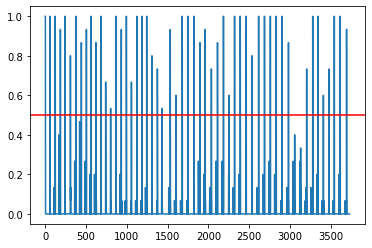

In [62]:
threshold = 0.5

plt.plot(df['pred'])
plt.axhline(y = threshold , color = 'r', linestyle = '-')

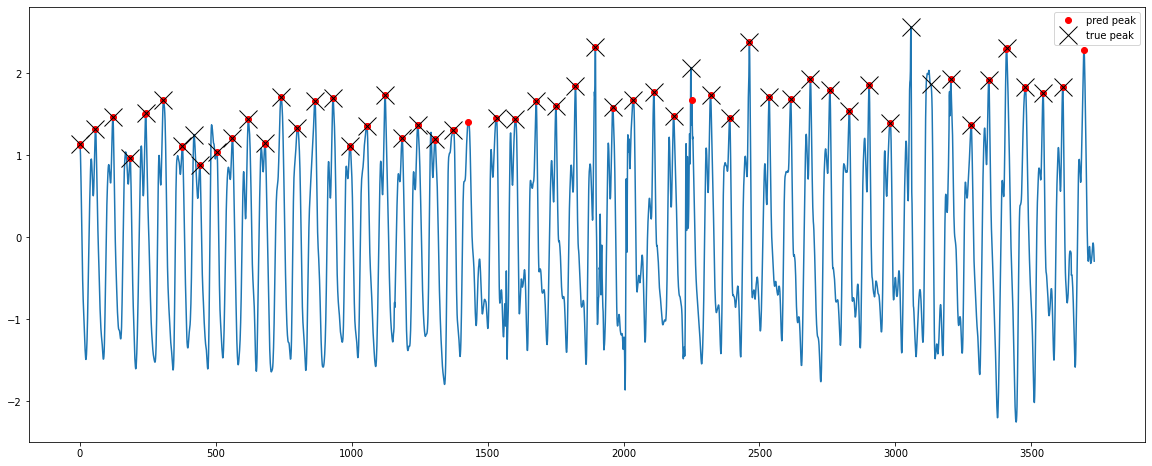

In [63]:

fig = plt.figure(figsize=(20,8))
plt.plot(df_x['x_test'])
plt.plot(np.where(df['pred']>threshold)[0],  df_x['x_test'][df['pred']>threshold], 'o', color = 'red' , label = 'pred peak')
plt.plot(np.where(df_x['y_test']==1)[0],  df_x['x_test'][df_x['y_test']==1], 'x', color = 'black', markersize=18 , label = 'true peak')
plt.legend()

In [64]:
print("Actual label:", len(np.where(df_x['y_test']==1)[0]))
print("Predicted label:", len(np.where(df['pred']>threshold)[0]))
lab_pos = np.where(df_x['y_test']==1)[0]
pred_pos = np.where(df['pred']>threshold)[0]
print(lab_pos)
print(pred_pos)
true_posi = len(np.intersect1d(lab_pos, pred_pos))

for z in lab_pos:
    if z not in pred_pos:
        if z+1 in pred_pos or z-1 in pred_pos:
            true_posi += 1


print("The 1-1 score is", round(true_posi/len(lab_pos),4))

Actual label: 54
Predicted label: 64
[   0   58  122  185  243  308  378  421  442  504  562  620  682  740
  801  865  932  994 1056 1123 1186 1244 1307 1374 1533 1602 1679 1751
 1823 1896 1961 2036 2111 2184 2248 2320 2391 2463 2535 2615 2687 2759
 2830 2903 2981 3057 3129 3204 3279 3343 3409 3478 3543 3615]
[   0    1   58  122  185  242  243  308  377  378  442  504  562  620
  681  682  740  801  865  932  994  995 1055 1056 1123 1186 1243 1244
 1306 1307 1374 1375 1429 1532 1602 1679 1751 1823 1896 1960 2036 2111
 2184 2252 2320 2390 2463 2535 2615 2687 2759 2830 2903 2981 3204 3278
 3343 3408 3409 3477 3478 3543 3615 3693]
The 1-1 score is 0.9259


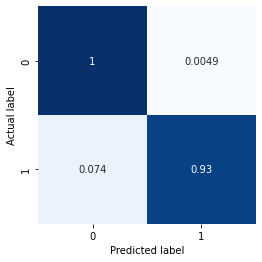

In [65]:
import seaborn as sns

normalize = True

mat = np.array(confusion_matrix(df_x['y_test'], df['pred']>threshold), dtype=float)
if normalize:
    mat[0,0] = mat[0,0]/len(df_x['y_test'][df_x['y_test'] == 0])
    mat[1,1] = true_posi/len(lab_pos)

    mat[0,1] = mat[0,1]/len(df_x['y_test'][df_x['y_test'] == 0])
    mat[1,0] = 1-true_posi/len(lab_pos)

labels = ['0', '1']
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

## Testing the Algorithm on the unlabeled data

#### From patient 8 to 20 we have no labels, but we want to test our algorithm and check by hand on a plot the accuracy of the predictions


In [ ]:
X = []
y = []
for i in range(len(datatest) - sequence_length):
   # if sum(data[i:i+sequence_length, 4]) == 1: 
        X.append(datatest[i:i+sequence_length, [1]])
X_test_nl = np.array(X)

In [ ]:
pred_y_nl = model.predict(X_test_nl) > 0.3
print(len(pred_y_nl))

In [ ]:
for i in range(len(pred_y_nl)-sequence_length+1):
        if i==0:
                pred_y_plot_nl = np.column_stack( ( pred_y_nl[i], np.arange(i,i+sequence_length,1)) )
        else:
                pred_y_plot_nl = np.row_stack( (pred_y_plot_nl, np.column_stack( ( pred_y_nl[i], np.arange(i,i+sequence_length,1)) )))      

df_nl = pd.DataFrame(pred_y_plot_nl,  columns=['pred','ind'])
df_nl = df_nl.groupby('ind').mean('pred')        

In [ ]:
for i in range(len(X_test_nl)-sequence_length+1):
        if i==0:
                xtest_y_plot_nl = np.column_stack( (X_test_nl[i,:,0] , np.arange(i,i+sequence_length,1) ) )
        else:
                xtest_y_plot_nl = np.row_stack( (xtest_y_plot_nl, np.column_stack( (X_test_nl[i,:,0], np.arange(i,i+sequence_length,1) ) ) ) )      

df_x_nl = pd.DataFrame(xtest_y_plot_nl,  columns=['x_test','ind'])
df_x_nl = df_x_nl.groupby('ind').mean('x_test')    

In [ ]:
import plotly.graph_objects as go

threshold = 0.3

fig = go.Figure()
fig.add_trace(go.Scatter(x= np.arange(0,len(df_x_nl['x_test']),1), y= df_x_nl['x_test'], name='Data'))
fig.add_trace(go.Scatter(x= np.where(df_nl['pred']>threshold)[0], y= df_x_nl['x_test'][df_nl['pred']>threshold], name='Label',mode='markers', marker = dict(color="red")))

## X' peaks
#### We tested our model on the x' (x prime) peaks, with a training procedure followed by a test on unseen data.

In [22]:
data = np.column_stack(( datatrain, peak_x ))

sequence_length = 15

# create input/output sequences for LSTM
X = []
y = []
for i in range(len(data) - sequence_length):
   # if sum(data[i:i+sequence_length, 4]) == 1: 
        X.append(data[i:i+sequence_length, [1]])
        y.append(data[i:i+sequence_length, 4])
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0.85)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#X_train = X_train[ y_train[np.sum(y_train, axis=1) == 1] ,:,: ]
#y_train = y_train[ y_train[np.sum(y_train, axis=1) == 1] ,: ]

permutation_train = np.random.permutation(X_train.shape[0])
X_train= X_train[permutation_train]
y_train = y_train[permutation_train]

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')


Training shape: (21145, 15, 1)
Testing shape: (3732, 15, 1)


In [47]:
print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')

input_shape = (X_train.shape[1], X_train.shape[2])

print(input_shape)

fc_size = sequence_length

input_data = keras.layers.Input(shape=input_shape, name='input0')

conv1 = keras.layers.Conv1D( 32, 6 , activation='relu',input_shape=input_shape[1:])(input_data)

#pool1 = keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last', name='pool1')(conv1)

conv2 = keras.layers.Conv1D( 16 , 3, activation='relu',input_shape=input_shape[1:])(conv1)

#pool2 = keras.layers.MaxPooling1D(pool_size=2, strides=None, padding='valid', data_format='channels_last', name='pool2')(conv2)

flat = keras.layers.Flatten()(conv2)

fc0 = keras.layers.Dense(128, activation=tf.nn.relu,  kernel_initializer='glorot_uniform', bias_initializer='zeros', name='fc0')(flat)

drop2 = keras.layers.Dropout(0.2)

output = keras.layers.Dense(sequence_length, activation=tf.nn.sigmoid, 
                            kernel_initializer='glorot_uniform', bias_initializer='zeros', name='output')(fc0)

model = keras.models.Model(inputs=[input_data], outputs=[output])

model.summary()

Training shape: (21145, 15, 1)
Testing shape: (3732, 15, 1)
(15, 1)
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input0 (InputLayer)         [(None, 15, 1)]           0         
                                                                 
 conv1d_12 (Conv1D)          (None, 10, 32)            224       
                                                                 
 conv1d_13 (Conv1D)          (None, 8, 16)             1552      
                                                                 
 flatten_6 (Flatten)         (None, 128)               0         
                                                                 
 fc0 (Dense)                 (None, 128)               16512     
                                                                 
 output (Dense)              (None, 15)                1935      
                                                         

In [48]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
rms = keras.optimizers.RMSprop(learning_rate=0.001 )
es = keras.callbacks.EarlyStopping(monitor='val_precision', mode='max', verbose=1, patience=10, start_from_epoch=50 )

model.compile(optimizer=adam,
              loss='binary_crossentropy',
              weighted_metrics=['Precision','TruePositives','FalsePositives'] )

history = model.fit(X_train, y_train, epochs=100, validation_split = 0.2, batch_size = 32, callbacks=[es])

Epoch 1/100


529/529 [==============================] - 7s 6ms/step - loss: 0.0841 - precision: 0.0205 - true_positives: 17.0000 - false_positives: 812.0000 - val_loss: 0.0490 - val_precision: 1.0000 - val_true_positives: 4.0000 - val_false_positives: 0.0000e+00
Epoch 2/100
529/529 [==============================] - 3s 6ms/step - loss: 0.0485 - precision: 0.6207 - true_positives: 252.0000 - false_positives: 154.0000 - val_loss: 0.0431 - val_precision: 0.7799 - val_true_positives: 124.0000 - val_false_positives: 35.0000
Epoch 3/100
529/529 [==============================] - 3s 5ms/step - loss: 0.0445 - precision: 0.6870 - true_positives: 643.0000 - false_positives: 293.0000 - val_loss: 0.0410 - val_precision: 0.6891 - val_true_positives: 164.0000 - val_false_positives: 74.0000
Epoch 4/100
529/529 [==============================] - 2s 4ms/step - loss: 0.0418 - precision: 0.7177 - true_positives: 905.0000 - false_positives: 356.0000 - val_loss: 0.0401 - val_precision: 0.6955 - val_true_positives: 217.

In [49]:
pred_y = model.predict(X_test) > 0.3
print(len(pred_y))

117/117 [==============================] - 1s 4ms/step
3732


In [50]:
for i in range(len(pred_y)-sequence_length+1):
        if i==0:
                pred_y_plot = np.column_stack( ( pred_y[i], np.arange(i,i+sequence_length,1)) )
        else:
                pred_y_plot = np.row_stack( (pred_y_plot, np.column_stack( ( pred_y[i], np.arange(i,i+sequence_length,1)) )))      

df = pd.DataFrame(pred_y_plot,  columns=['pred','ind'])
df = df.groupby('ind').sum('pred')        
df['pred'] = df['pred']/sequence_length 

In [51]:
for i in range(len(X_test)-sequence_length+1):
        if i==0:
                xtest_y_plot = np.column_stack( (X_test[i,:,0] , np.arange(i,i+sequence_length,1), y_test[i]) )
        else:
                xtest_y_plot = np.row_stack( (xtest_y_plot, np.column_stack( (X_test[i,:,0], np.arange(i,i+sequence_length,1), y_test[i]) )))      

df_x = pd.DataFrame(xtest_y_plot,  columns=['x_test','ind', 'y_test'])
df_x = df_x.groupby('ind').mean('x_test', 'y_test')        
#df['pred'] = df['pred']/sequence_length 

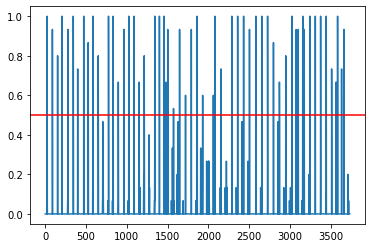

In [52]:
threshold = 0.5

plt.plot(df['pred'])
plt.axhline(y = threshold , color = 'r', linestyle = '-')
plt.show()

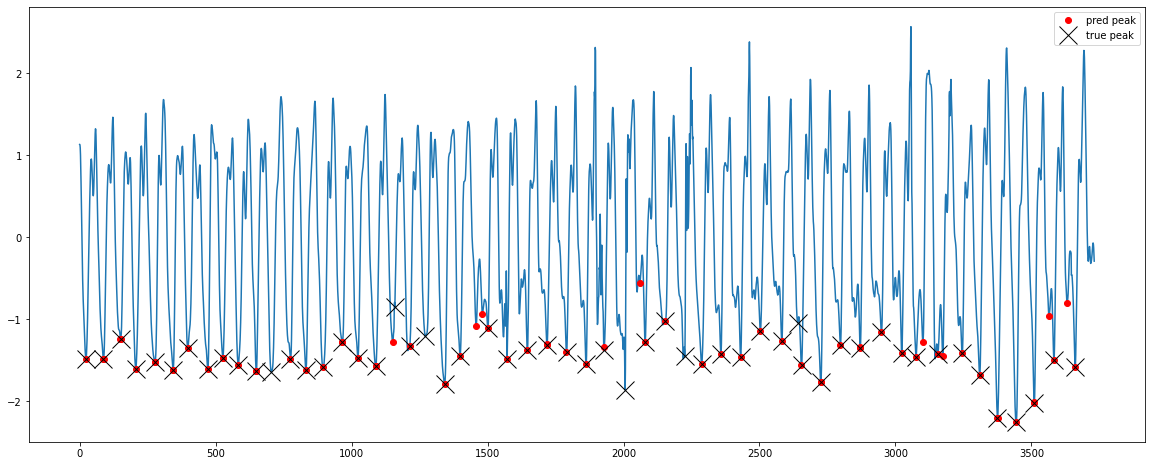

In [53]:
fig = plt.figure(figsize=(20,8))
plt.plot(df_x['x_test'])
plt.plot(np.where(df['pred']>threshold)[0],  df_x['x_test'][df['pred']>threshold], 'o', color = 'red' , label = 'pred peak')
plt.plot(np.where(df_x['y_test']==1)[0],  df_x['x_test'][df_x['y_test']==1], 'x', color = 'black', markersize=18 , label = 'true peak')
plt.legend()
plt.show()

In [54]:
print("Actual label:", len(np.where(df_x['y_test']==1)[0]))
print("Predicted label:", len(np.where(df['pred']>threshold)[0]))
lab_pos = np.where(df_x['y_test']==1)[0]
pred_pos = np.where(df['pred']>threshold)[0]
print(lab_pos)
print(pred_pos)
true_posi = len(np.intersect1d(lab_pos, pred_pos))

for z in lab_pos:
    if z not in pred_pos:
        if z+1 in pred_pos or z-1 in pred_pos:
            true_posi += 1


print("The 1-1 score is", round(true_posi/len(lab_pos),4))

Actual label: 55
Predicted label: 70
[  23   87  151  206  277  343  398  471  526  583  650  705  775  832
  895  966 1023 1089 1159 1213 1271 1342 1399 1501 1572 1646 1719 1791
 1862 1928 2006 2079 2154 2225 2287 2358 2431 2503 2582 2641 2655 2726
 2798 2871 2948 3023 3076 3156 3245 3310 3375 3444 3511 3583 3661]
[  23   87   88  150  151  206  276  277  343  344  397  471  526  527
  583  649  650  775  832  895  965  966 1023 1088 1089 1151 1213 1342
 1399 1458 1481 1501 1572 1646 1718 1719 1790 1862 1929 2060 2079 2154
 2287 2358 2431 2503 2582 2654 2725 2726 2797 2870 2871 2948 3023 3076
 3101 3156 3174 3245 3310 3375 3376 3444 3510 3511 3565 3583 3632 3661]
The 1-1 score is 0.8909


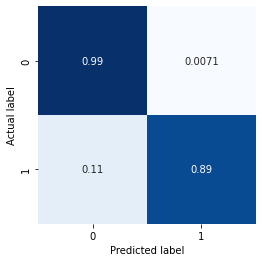

In [55]:
import seaborn as sns

normalize = True

mat = np.array(confusion_matrix(df_x['y_test'], df['pred']>threshold), dtype=float)
if normalize:
    mat[0,0] = mat[0,0]/len(df_x['y_test'][df_x['y_test'] == 0])
    mat[1,1] = true_posi/len(lab_pos)

    mat[0,1] = mat[0,1]/len(df_x['y_test'][df_x['y_test'] == 0])
    mat[1,0] = 1-true_posi/len(lab_pos)

labels = ['0', '1']
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()